## Column Values Normalization

In [49]:
import pandas as pd;
import numpy as np;
from ydata_profiling import ProfileReport

In [50]:
cleaned_df = pd.read_csv("../../data/cleaned_responses.csv", low_memory=False)
cleaned_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,Used TPU,2-3 years,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...","Scikit-learn , TensorFlow , Keras , Rand..."
1,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,Never,< 1 years,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn , RandomForest, Xgboost , Li..."
2,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,Used TPU,2-3 years,"Kaggle (forums, blog, social media, etc), Cour...","Udacity, Coursera, edX, Kaggle Courses (i.e. K...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Python, R, Bash","Matplotlib , Plotly / Plotly Express , Boke...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Scikit-learn , TensorFlow , Keras , PyTo..."
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),...,Used TPU,3-4 years,"Hacker News (https://news.ycombinator.com/), B...","Udemy, University Courses (resulting in a univ...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Python,"Matplotlib , Plotly / Plotly Express",CPUs,"Linear or Logistic Regression, Decision Trees ...","Scikit-learn , TensorFlow , Keras , Spar..."
4,55-59,Male,Netherlands,Master’s degree,Other,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,...,Never,< 1 years,"Kaggle (forums, blog, social media, etc), Cour...",Coursera,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Python, SQL","Matplotlib , D3.js , Seaborn",CPUs,"Linear or Logistic Regression, Bayesian Approa...","Scikit-learn , PyTorch"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,25-29,Male,India,Master’s degree,Data Scientist,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,...,Never,2-3 years,"Hacker News (https://news.y

### Remove unnecessary details 

In [51]:
# Function to remove text within parentheses and clean up spaces for multiple columns
def clean_columns(df, columns):
    for column in columns:
        if column in df.columns:
            # Remove text within parentheses
            df.loc[:, column] = df[column].str.replace(r"\s*\(.*?\)", "", regex=True)
            # Remove extra spaces around commas and trim leading/trailing spaces
            df.loc[:, column] = df[column].str.replace(r"\s*,\s*", ", ", regex=True).str.strip()
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    return df

In [52]:
# Specify the columns you want to clean
columns_to_clean = ['On which platforms have you begun or completed data science courses?', 
                    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?',
                    'What data visualization libraries or tools do you use on a regular basis?',
                    'Which of the following ML algorithms do you use on a regular basis?',
                    'Which of the following machine learning frameworks do you use on a regular basis?',
                    'Who/what are your favorite media sources that report on data science topics?'
                    ]

# Apply the function to the specified columns
cleaned_df = clean_columns(cleaned_df, columns_to_clean)

cleaned_df

Column 'Which of the following hosted notebook products do you use on a regular basis?' not found in the DataFrame.
Column 'Which categories of ML tools do you use on a regular basis?' not found in the DataFrame.


,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,Used TPU,2-3 years,"Podcasts, Blogs, Journal Publications, Slack C...","Coursera, edX, DataCamp, University Courses","Jupyter, Visual Studio / Visual Studio Code","Python, R, SQL, Bash","Ggplot / ggplot2, Matplotlib, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...","Scikit-learn, TensorFlow, Keras, RandomForest"
1,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,Never,< 1 years,"YouTube, Blogs, Other",Other,Jupyter,"Python, SQL","Matplotlib, Plotly / Plotly Express, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn, RandomForest, Xgboost, LightGBM"
2,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,Used TPU,2-3 years,"Kaggle, Course Forums, YouTube, Podcasts, Jour...","Udacity, Coursera, edX, Kaggle Courses, Udemy","Jupyter, Spyder, Notepad++, Sublime Text","Python, R, Bash","Matplotlib, Plotly / Plotly Express, Bokeh, Se...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Scikit-learn, TensorFlow, Keras, PyTorch"
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),...,Used TPU,3-4 years,"Hacker News, Blogs, Journal Publications","Udemy, University Courses","Jupyter, Spyder",Python,"Matplotlib, Plotly / Plotly Express",CPUs,"Linear or Logistic Regression, Decision Trees ...","Scikit-learn, TensorFlow, Keras, Spark MLib"
4,55-59,Male,Netherlands,Master’s degree,Other,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,...,Never,< 1 years,"Kaggle, Course Forums, Blogs",Coursera,Jupyter,"Python, SQL","Matplotlib, D3.js, Seaborn",CPUs,"Linear or Logistic Regression, Bayesian Approa...","Scikit-learn, PyTorch"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,25-29,Male,India,Master’s degree,Data Scientist,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,...,Never,2-3 years,"Hacker News, Kaggle, YouTube, Slack Communities","Kaggle Courses, LinkedIn Learning","Jupyter, PyCharm, MATLAB, Notepad++","Python, MATLAB",Matplotlib,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Scikit-learn, TensorFlow, PyTorch,

### Normalize the features value

#### Normalizing feature : What is the size of the company where you are employed?  

In [53]:
# Function to normalize company size categories
def normalize_company_size(df, column):
    # Dictionary to map detailed company size ranges to normalized versions
    size_normalization_dict = {
        r"0-49 employees": "Small",
        r"50-249 employees": "Medium",
        r"250-999 employees": "Mid-Large",
        r"1000-9,999 employees": "Large",
        r"> 10,000 employees": "Enterprise"
    }
    
    # Apply replacements using the dictionary
    for pattern, replacement in size_normalization_dict.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    
    return df

# Apply the normalization function
normalize_company_size(cleaned_df, 'What is the size of the company where you are employed?')

# Display the normalized column
cleaned_df['What is the size of the company where you are employed?'].value_counts()

What is the size of the company where you are employed?
Small         2232
Enterprise    1800
Large         1517
Medium        1274
Mid-Large      993
Name: count, dtype: int64

Normalizing feature : What is your current yearly compensation (approximate $USD)? <br/> <br/>

- **Removing $ symbol**: This step ensures that any dollar signs in the compensation values are stripped out, allowing for easier numerical processing. <br/>
- **Mean Value**: For ranges defined with a hyphen (e.g., "50,000 - 70,000"), the average of the lower and upper bounds is calculated to represent a single numerical value. <br/>
- **Normalize value**: The calculated compensation values are then normalized using min-max normalization, which scales the values to a range of 0 to 1. This is useful for subsequent analysis and modeling. <br/>

In [54]:
# # Function to extract minimum and maximum values
# # Function to extract minimum and maximum values
# def parse_salary_range(salary_range):
#     try:
#         # Remove unwanted characters like $ and commas
#         clean_range = salary_range.replace("$", "").replace(",", "").strip()
        
#         # Handle cases like "> 500000" and "< 1000"
#         if clean_range.startswith(">"):
#             min_salary = int(clean_range[1:].strip())
#             max_salary = 0  # Undefined upper limit
#         elif clean_range.startswith("<"):
#             min_salary = 0  # Undefined lower limit
#             max_salary = int(clean_range[1:].strip())
#         else:
#             # Split the range into parts using '-' as a separator
#             parts = clean_range.split('-')
            
#             # If only one value is present, use it for both min and max
#             if len(parts) == 1:
#                 min_salary = max_salary = int(parts[0])
#             else:
#                 min_salary, max_salary = map(int, parts)  # Convert both parts to integers
#         return min_salary, max_salary
#     except (ValueError, AttributeError):
#         # Handle invalid or unexpected formats gracefully
#         return None, None

# # Apply the function to the DataFrame
# cleaned_df[['Min_Salary', 'Max_Salary']] = cleaned_df['What is your current yearly compensation (approximate $USD)?'].apply(
#     lambda x: pd.Series(parse_salary_range(x))
# )

# cleaned_df

In [55]:
# Define a function to clean and extract the main tool category
def extract_main_tool(text):
    # Step 1: Split by comma, then take the first part
    main_tool = text.split(',')[0].strip()
    
    # Step 2: Check for "Other" and ignore it if found
    if main_tool.lower() == "other":
        return "Other"
    
    # Step 3: Split by the first '(' to remove details in parentheses, if any
    return main_tool.split('(')[0].strip()

# Apply the function to the column
cleaned_df['What is the primary tool that you use at work or school to analyze data?'] = cleaned_df[
    'What is the primary tool that you use at work or school to analyze data?'].apply(extract_main_tool)

# Convert the column to categorical type
cleaned_df['What is the primary tool that you use at work or school to analyze data?'] = cleaned_df[
    'What is the primary tool that you use at work or school to analyze data?'].astype('category')

# Verify the unique values after normalization
print(cleaned_df['What is the primary tool that you use at work or school to analyze data?'].unique())

['Local development environments', 'Basic statistical software', 'Other', 'Advanced statistical software', 'Cloud-based data software & APIs', 'Business intelligence software']
Categories (6, object): ['Advanced statistical software', 'Basic statistical software', 'Business intelligence software', 'Cloud-based data software & APIs', 'Local development environments', 'Other']


### Feature Selection

In [56]:
# Columns to remove
columns_to_remove = [
    "Who/what are your favorite media sources that report on data science topics?",
    "On which platforms have you begun or completed data science courses?",
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?",
    "What programming languages do you use on a regular basis?",
    "What data visualization libraries or tools do you use on a regular basis?",
    "Which types of specialized hardware do you use on a regular basis?",
    "Which of the following ML algorithms do you use on a regular basis?",
    "Which of the following machine learning frameworks do you use on a regular basis?",
]

# Drop the specified columns
cleaned_df = cleaned_df.drop(columns=columns_to_remove, errors='ignore')

# Display the cleaned DataFrame
cleaned_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,Local development environments,3-5 years,Python,Never,2-3 years
7812,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,We are exploring ML methods (and may one day p...,"5,000-7,499",$100-$999,Local development environments,1-2 years,Python,Never,1-2 years
7813,25-29,Male,China,I prefer not to answer,Data Engineer,Mid-Large,5-9,"We recently started using ML methods (i.e., mo...","20,000-24,999",$100-$999,Local development environments,1-2 years,Python,Used TPU,1-2 years
7814,25-29,Male,Australia,Bachelor’s degree,Other,Large,5-9,No (we do not use ML methods),"60,000-69,999","$10,000-$99,999",Local development environments,3-5 years,Python,Never,1-2 years


#### Removal of duplicated values
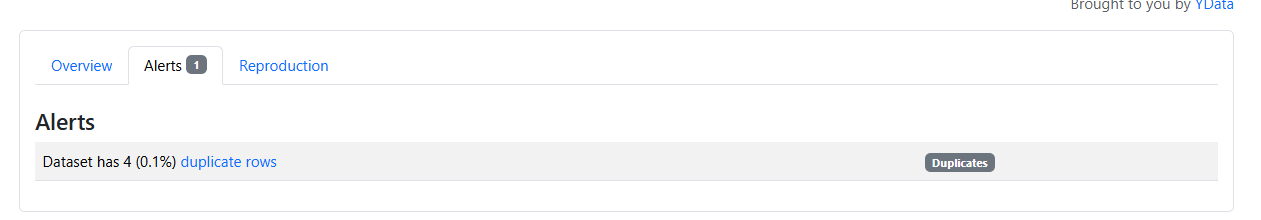

In [57]:
# Remove duplicates (keeping the first occurrence)
cleaned_df = cleaned_df.drop_duplicates()

# Reset the index to maintain a clean, sequential order
cleaned_df.reset_index(drop=True, inplace=True)

cleaned_df.shape

(7812, 15)

In [58]:
# Calculate the number of missing values in each column
missing_values = cleaned_df.isnull().sum()

# Display the result
print(missing_values)

What is your age (# years)?                                                                                                           0
What is your gender?                                                                                                                  0
In which country do you currently reside?                                                                                             0
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                       0
Select the title most similar to your current role (or most recent title if retired)                                                  0
What is the size of the company where you are employed?                                                                               0
Approximately how many individuals are responsible for data science workloads at your place of business?                              0
Does your current employer incorporate machine l

In [59]:
# Drop all rows with any null values
cleaned_df = cleaned_df.dropna()

# Calculate the number of missing values in each column
missing_values = cleaned_df.isnull().sum()

# Display the result
print(missing_values)

What is your age (# years)?                                                                                                          0
What is your gender?                                                                                                                 0
In which country do you currently reside?                                                                                            0
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                      0
Select the title most similar to your current role (or most recent title if retired)                                                 0
What is the size of the company where you are employed?                                                                              0
Approximately how many individuals are responsible for data science workloads at your place of business?                             0
Does your current employer incorporate machine learning

In [60]:
# Create the final profile report
profile_preprocessed_survey_check = ProfileReport(cleaned_df)
profile_preprocessed_survey_check.to_file('prep_survey_profile.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 73.71it/s]


In [61]:
# Save to a new CSV
cleaned_df.to_csv("../../data/prep_survey_profile.csv", index=False)